In [1]:
import pandas as pd


### 위해 지표 선정
##### 인구만명당 5대 주요 범죄 * 발생 건수(.500) - 살인, 강도, 강간, 폭력, 절도

In [2]:
crime=pd.read_csv('data/crime(5.csv')
crime


,기간,자치구,합계,합계.1,살인,살인.1,강도,강도.1,강간강제추행,강간강제추행.1,절도,절도.1,폭력,폭력.1
0,기간,자치구,발생,검거,발생,검거,발생,검거,발생,검거,발생,검거,발생,검거
1,2020,합계,"92,679","66,548",141,126,138,132,"5,763","5,458","38,293","19,705","48,344","41,127"
2,2020,종로구,"3,102","3,343",9,7,7,9,192,855,"1,183",944,"1,711","1,528"
3,2020,중구,"3,411","2,323",2,2,5,6,186,128,"1,642",863,"1,576","1,324"
4,2020,용산구,"2,969","2,056",5,3,6,6,230,186,"1,111",534,"1,617","1,327"
5,2020,성동구,"2,362","1,774",5,5,3,3,115,98,"1,016",565,"1,223","1,103"
6,2020,광진구,"3,601","2,511",2,2,4,4,255,224,"1,664",874,"1,676","1,407"
7,2020,동대문구,"3,401","2,465",10,8,6,5,161,142,"1,440",713,"1,784","1,597"
8,2020,중랑구,"3,726","2,781",10,9,5,6,183,153,"1,506",889,"2,022","1,724"
9,2020,성북구,"2,567","1,947",4,4,3,2,142,121,988,580,"1,430","1,240"


In [3]:
pop_seoul = pd.read_csv("data/인구__가구_및_주택__읍면동_2015_2020___시군구_20162019__20220603165301.csv", encoding="cp949")
pop_seoul_2020 = pd.DataFrame(pop_seoul[["행정구역별(읍면동)", "2020"]])
column1 = ["자치구", "총인구(명)"]
pop_seoul_2020.drop([0, 1], inplace = True)
pop_seoul_2020.columns = column1
pop_seoul_2020["총인구(명)"] = pop_seoul_2020["총인구(명)"].astype(int)

In [4]:
crime_five = crime.iloc[:, [1, 2, 4, 6, 8, 10 ,12]].drop([0, 1])
crime_five.reset_index(drop=True, inplace=True)
crime_five.rename(columns={"합계": "5대범죄건수"}, inplace=True)
crime_five_total = crime_five.loc[:, ["자치구", "5대범죄건수"]]
crime_five_total["5대범죄건수"] = pd.to_numeric(crime_five_total["5대범죄건수"].str.replace(",", ""))
crime_five_total

,자치구,5대범죄건수
0,종로구,3102
1,중구,3411
2,용산구,2969
3,성동구,2362
4,광진구,3601
5,동대문구,3401
6,중랑구,3726
7,성북구,2567
8,강북구,2770
9,도봉구,2179


In [5]:
pop_10000_df = pd.merge(pop_seoul_2020, crime_five_total, how ="left", on = "자치구")
pop_10000_df["인구만명당 5대범죄건수"] = pop_10000_df["5대범죄건수"] / pop_10000_df["총인구(명)"] * 10000
pop_10000_df["위해지표"] = pop_10000_df["인구만명당 5대범죄건수"] * 0.5
pop_10000_df

,자치구,총인구(명),5대범죄건수,인구만명당 5대범죄건수,위해지표
0,종로구,151291,3102,205.035329,102.517665
1,중구,128744,3411,264.944386,132.472193
2,용산구,225882,2969,131.440310,65.720155
3,성동구,291918,2362,80.913133,40.456567
4,광진구,353967,3601,101.732647,50.866324
5,동대문구,351057,3401,96.878854,48.439427
6,중랑구,385663,3726,96.612846,48.306423
7,성북구,438833,2567,58.496057,29.248028
8,강북구,299535,2770,92.476672,46.238336
9,도봉구,315979,2179,68.960279,34.480140


### 취약지표 선정
##### 인구만명당 집객 시설수(0.049), 인구만명당 1인가구수(0.029), 인구만명당 주점업 업체수(0.122)

In [6]:
onegagu = pd.read_csv("data/서울시1인가구_시군구별.csv", encoding="utf-8", index_col=0)
# onegagu.drop(0, inplace=True)
onegagu_df = onegagu.loc[onegagu["성별"] == "계"]
onegagu_df = onegagu_df.iloc[:, [0, 1, 34]]
onegagu_df.drop("성별", axis = 1, inplace=True)
onegagu_df.columns = ["자치구", "1인가구수"]
onegagu_df["1인가구수"] = onegagu_df["1인가구수"].astype(int)
pop_10000_df = pd.merge(pop_10000_df, onegagu_df, how ="left", on = "자치구")
pop_10000_df["인구만명당 1인가구수"] = pop_10000_df["1인가구수"] / pop_10000_df["총인구(명)"] * 10000
pop_10000_df.sort_values(by = "인구만명당 1인가구수", ascending=False)

,자치구,총인구(명),5대범죄건수,인구만명당 5대범죄건수,위해지표,1인가구수,인구만명당 1인가구수
20,관악구,502641,5261,104.667148,52.333574,129233,2571.079558
1,중구,128744,3411,264.944386,132.472193,22818,1772.354440
4,광진구,353967,3601,101.732647,50.866324,62301,1760.079329
5,동대문구,351057,3401,96.878854,48.439427,60925,1735.473157
13,마포구,365612,3688,100.871963,50.435981,63172,1727.842631
0,종로구,151291,3102,205.035329,102.517665,25983,1717.418749
17,금천구,249419,2598,104.162073,52.081036,42334,1697.304536
2,용산구,225882,2969,131.440310,65.720155,36881,1632.755155
19,동작구,392772,3200,81.472203,40.736101,64101,1632.015520
18,영등포구,403619,5217,129.255560,64.627780,64000,1585.653797


In [7]:
attraction = pd.read_csv("data/서울시 우리마을가게 상권분석서비스(상권-집객시설).csv", encoding="cp949")
attraction = attraction.loc[(attraction["기준_년_코드"] == 2021) & (attraction["기준_분기_코드"] == 4)]
attraction = attraction.iloc[:, 4:7]
attraction.reset_index(drop=True, inplace=True)
attraction

,상권_코드,상권_코드_명,집객시설_수
0,2130021,신설종합시장,1
1,2110343,무너미어린이공원,11
2,2111024,경찰병원역 4번(건너말공원),1
3,2130001,통인시장,2
4,2110616,양목초등학교,1
...,...,...,...
1570,2110516,정원여중,10
1571,2110565,홍익대,5
1572,2110894,관악동부센트레빌아파트(은천로35라길),1
1573,2110148,어린이대공원역 3번,1


In [8]:
commercial = pd.read_csv("data/서울시 우리마을가게 상권분석서비스(상권영역).csv", encoding="cp949")
total_df = pd.merge(attraction, commercial , how = "left", on = "상권_코드")
attraction_df = total_df.iloc[:, [0, 1, 2, 9]]
attraction_df['시군구_코드']=attraction_df['시군구_코드'].replace([11680, 11740,11305,11500,11620, 11215, 11530, 11545, 11350, 11320, 11230, 11590, 11440, 11410, 11650, 11200, 11290, 11710, 11470, 11560, 11170, 11380, 11110, 11140, 11260],['강남구','강동구','강북구','강서구','관악구','광진구', '구로구' , '금천구','노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구','서초구', '성동구','성북구', '송파구', '양천구','영등포구','용산구','은평구','종로구','중구','중랑구'])
attraction_df.rename(columns={"시군구_코드": "자치구"}, inplace = True)
attraction_df1 = attraction_df["집객시설_수"].groupby(attraction_df["자치구"]).sum()
attraction_df1.info()

<class 'pandas.core.series.Series'>
Index: 25 entries, 강남구 to 중랑구
Series name: 집객시설_수
Non-Null Count  Dtype
--------------  -----
25 non-null     int64
dtypes: int64(1)
memory usage: 400.0+ bytes


C:\Users\user\AppData\Local\Temp\ipykernel_25700\3662355175.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attraction_df['시군구_코드']=attraction_df['시군구_코드'].replace([11680, 11740,11305,11500,11620, 11215, 11530, 11545, 11350, 11320, 11230, 11590, 11440, 11410, 11650, 11200, 11290, 11710, 11470, 11560, 11170, 11380, 11110, 11140, 11260],['강남구','강동구','강북구','강서구','관악구','광진구', '구로구' , '금천구','노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구','서초구', '성동구','성북구', '송파구', '양천구','영등포구','용산구','은평구','종로구','중구','중랑구'])
C:\Users\user\AppData\Local\Temp\ipykernel_25700\3662355175.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

In [9]:
attraction_df1 = pd.DataFrame(attraction_df1)
attraction_df1.reset_index(drop=False, inplace=True)
attraction_df1

,자치구,집객시설_수
0,강남구,2831
1,강동구,1188
2,강북구,934
3,강서구,1266
4,관악구,1074
5,광진구,920
6,구로구,1175
7,금천구,887
8,노원구,922
9,도봉구,627


In [10]:
pop_10000_df = pd.merge(pop_10000_df, attraction_df1, how = "left", on = "자치구")
pop_10000_df

,자치구,총인구(명),5대범죄건수,인구만명당 5대범죄건수,위해지표,1인가구수,인구만명당 1인가구수,집객시설_수
0,종로구,151291,3102,205.035329,102.517665,25983,1717.418749,1768
1,중구,128744,3411,264.944386,132.472193,22818,1772.354440,2153
2,용산구,225882,2969,131.440310,65.720155,36881,1632.755155,982
3,성동구,291918,2362,80.913133,40.456567,42585,1458.800074,775
4,광진구,353967,3601,101.732647,50.866324,62301,1760.079329,920
5,동대문구,351057,3401,96.878854,48.439427,60925,1735.473157,1144
6,중랑구,385663,3726,96.612846,48.306423,56605,1467.732191,981
7,성북구,438833,2567,58.496057,29.248028,61510,1401.672162,1083
8,강북구,299535,2770,92.476672,46.238336,45685,1525.197389,934
9,도봉구,315979,2179,68.960279,34.480140,34884,1103.997418,627


In [11]:
pop_10000_df["인구만명당 집객 시설수"] = pop_10000_df["집객시설_수"] / pop_10000_df["총인구(명)"] * 10000

In [12]:
store = pd.read_excel("data/서울상가정보.xlsx")
store_df = store.loc[:, ["상호명", "표준산업분류명", "시군구명"]]

In [13]:
store_df.dropna(subset =["표준산업분류명"], inplace=True)
store_df1 = store_df.loc[store_df["표준산업분류명"].str.contains("주점")]
store_df1.rename(columns={"시군구명": "자치구"}, inplace=True)
store_df2 = pd.DataFrame(store_df1["자치구"].value_counts())
store_df2.reset_index(drop=False, inplace=True)
store_df2.columns = ["자치구", "주점업 업체수"]
store_df2

C:\Users\user\AppData\Local\Temp\ipykernel_25700\1571641080.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store_df1.rename(columns={"시군구명": "자치구"}, inplace=True)


,자치구,주점업 업체수
0,강남구,753
1,마포구,659
2,강서구,527
3,송파구,497
4,구로구,486
5,관악구,470
6,영등포구,468
7,강동구,420
8,광진구,419
9,서초구,416


In [14]:
pop_10000_df = pd.merge(pop_10000_df, store_df2, how = "left", on = "자치구")
pop_10000_df

,자치구,총인구(명),5대범죄건수,인구만명당 5대범죄건수,위해지표,1인가구수,인구만명당 1인가구수,집객시설_수,인구만명당 집객 시설수,주점업 업체수
0,종로구,151291,3102,205.035329,102.517665,25983,1717.418749,1768,116.860884,322
1,중구,128744,3411,264.944386,132.472193,22818,1772.354440,2153,167.231094,393
2,용산구,225882,2969,131.440310,65.720155,36881,1632.755155,982,43.474026,391
3,성동구,291918,2362,80.913133,40.456567,42585,1458.800074,775,26.548551,269
4,광진구,353967,3601,101.732647,50.866324,62301,1760.079329,920,25.991123,419
5,동대문구,351057,3401,96.878854,48.439427,60925,1735.473157,1144,32.587301,338
6,중랑구,385663,3726,96.612846,48.306423,56605,1467.732191,981,25.436715,379
7,성북구,438833,2567,58.496057,29.248028,61510,1401.672162,1083,24.679092,309
8,강북구,299535,2770,92.476672,46.238336,45685,1525.197389,934,31.181665,353
9,도봉구,315979,2179,68.960279,34.480140,34884,1103.997418,627,19.843091,220


In [15]:
pop_10000_df["인구만명당 주점업 업체수"] = pop_10000_df["주점업 업체수"] / pop_10000_df["총인구(명)"] * 10000
vulnerable_indicators = (pop_10000_df["인구만명당 집객 시설수"] * 0.049) + (pop_10000_df["인구만명당 1인가구수"] * 0.029) + (pop_10000_df["인구만명당 주점업 업체수"] * 0.122)
pop_10000_df["취약지표"] = vulnerable_indicators
pop_10000_df.sort_values(by="취약지표", ascending=False).head()

,자치구,총인구(명),5대범죄건수,인구만명당 5대범죄건수,위해지표,1인가구수,인구만명당 1인가구수,집객시설_수,인구만명당 집객 시설수,주점업 업체수,인구만명당 주점업 업체수,취약지표
20,관악구,502641,5261,104.667148,52.333574,129233,2571.079558,1074,21.367139,470,9.350610,76.749071
1,중구,128744,3411,264.944386,132.472193,22818,1772.354440,2153,167.231094,393,30.525694,63.316737
0,종로구,151291,3102,205.035329,102.517665,25983,1717.418749,1768,116.860884,322,21.283487,58.127912
13,마포구,365612,3688,100.871963,50.435981,63172,1727.842631,1217,33.286654,659,18.024572,53.937480
4,광진구,353967,3601,101.732647,50.866324,62301,1760.079329,920,25.991123,419,11.837262,53.760012


### 경감지표
##### 인구만명당 경찰관서수(0.194), 인구만명당 범죄예방 CCTV대수(0.106)

In [16]:
cctv_seoul = pd.read_csv("data/서울CCTV현황.csv", index_col = 0)
column = ["자치구", "주소", "사용목적", "lat", "lng", "갯수", "UpdateDate"]
cctv_seoul.columns = column
cctv_seoul_total = pd.DataFrame(cctv_seoul["자치구"].value_counts())
cctv_seoul_total.reset_index(drop = False, inplace = True)
cctv_seoul_total.columns = ["자치구", "CCTV총합"]


In [17]:
pop_10000_df = pd.merge(pop_10000_df, cctv_seoul_total, how = "left", on = "자치구")
pop_10000_df["인구만명당 CCTV대수"] = pop_10000_df["CCTV총합"] / pop_10000_df["총인구(명)"] * 10000
pop_10000_df

,자치구,총인구(명),5대범죄건수,인구만명당 5대범죄건수,위해지표,1인가구수,인구만명당 1인가구수,집객시설_수,인구만명당 집객 시설수,주점업 업체수,인구만명당 주점업 업체수,취약지표,CCTV총합,인구만명당 CCTV대수
0,종로구,151291,3102,205.035329,102.517665,25983,1717.418749,1768,116.860884,322,21.283487,58.127912,1649,108.995248
1,중구,128744,3411,264.944386,132.472193,22818,1772.354440,2153,167.231094,393,30.525694,63.316737,908,70.527559
2,용산구,225882,2969,131.440310,65.720155,36881,1632.755155,982,43.474026,391,17.309923,51.591937,909,40.242250
3,성동구,291918,2362,80.913133,40.456567,42585,1458.800074,775,26.548551,269,9.214917,44.730301,1302,44.601566
4,광진구,353967,3601,101.732647,50.866324,62301,1760.079329,920,25.991123,419,11.837262,53.760012,912,25.765114
5,동대문구,351057,3401,96.878854,48.439427,60925,1735.473157,1144,32.587301,338,9.628066,53.100123,2630,74.916609
6,중랑구,385663,3726,96.612846,48.306423,56605,1467.732191,981,25.436715,379,9.827233,45.009555,3354,86.967119
7,성북구,438833,2567,58.496057,29.248028,61510,1401.672162,1083,24.679092,309,7.041403,42.716819,3478,79.255662
8,강북구,299535,2770,92.476672,46.238336,45685,1525.197389,934,31.181665,353,11.784933,47.196388,1417,47.306659
9,도봉구,315979,2179,68.960279,34.480140,34884,1103.997418,627,19.843091,220,6.962488,33.837660,1136,35.951756


In [18]:
police_substation = pd.read_csv("data/경찰청_전국 경찰관서 현황_20211231.csv", encoding="cp949")
police_substation_seoul = police_substation.loc[police_substation["전체기관명"].str.contains("서울")]
police_substation_seoul.reset_index(drop = True, inplace=True)

In [131]:
district = pop_10000_df["자치구"]
district_list = []
for gu in district:
    for police in police_substation_seoul["도로명주소"]:
        if gu in police:
            district_list.append(gu)

In [20]:
from collections import Counter

counts = Counter(district_list)
police_counts = pd.DataFrame([counts.keys(), counts.values()])
police_counts = police_counts.T
police_counts.columns = ["자치구", "경찰관서수"]
police_counts

,자치구,경찰관서수
0,종로구,23
1,중구,17
2,용산구,8
3,성동구,10
4,광진구,11
5,동대문구,12
6,중랑구,9
7,성북구,12
8,강북구,10
9,도봉구,9


In [21]:
pop_10000_df = pd.merge(pop_10000_df, police_counts, how = "left", on = "자치구")
pop_10000_df

,자치구,총인구(명),5대범죄건수,인구만명당 5대범죄건수,위해지표,1인가구수,인구만명당 1인가구수,집객시설_수,인구만명당 집객 시설수,주점업 업체수,인구만명당 주점업 업체수,취약지표,CCTV총합,인구만명당 CCTV대수,경찰관서수
0,종로구,151291,3102,205.035329,102.517665,25983,1717.418749,1768,116.860884,322,21.283487,58.127912,1649,108.995248,23
1,중구,128744,3411,264.944386,132.472193,22818,1772.354440,2153,167.231094,393,30.525694,63.316737,908,70.527559,17
2,용산구,225882,2969,131.440310,65.720155,36881,1632.755155,982,43.474026,391,17.309923,51.591937,909,40.242250,8
3,성동구,291918,2362,80.913133,40.456567,42585,1458.800074,775,26.548551,269,9.214917,44.730301,1302,44.601566,10
4,광진구,353967,3601,101.732647,50.866324,62301,1760.079329,920,25.991123,419,11.837262,53.760012,912,25.765114,11
5,동대문구,351057,3401,96.878854,48.439427,60925,1735.473157,1144,32.587301,338,9.628066,53.100123,2630,74.916609,12
6,중랑구,385663,3726,96.612846,48.306423,56605,1467.732191,981,25.436715,379,9.827233,45.009555,3354,86.967119,9
7,성북구,438833,2567,58.496057,29.248028,61510,1401.672162,1083,24.679092,309,7.041403,42.716819,3478,79.255662,12
8,강북구,299535,2770,92.476672,46.238336,45685,1525.197389,934,31.181665,353,11.784933,47.196388,1417,47.306659,10
9,도봉구,315979,2179,68.960279,34.480140,34884,1103.997418,627,19.843091,220,6.962488,33.837660,1136,35.951756,9


In [22]:
pop_10000_df["인구만명당 경찰관서수"] = pop_10000_df["경찰관서수"] / pop_10000_df["총인구(명)"] * 10000
pop_10000_df["경감지표"] = (pop_10000_df["인구만명당 CCTV대수"] * 0.106) + (pop_10000_df["인구만명당 경찰관서수"] * 0.194)
pop_10000_Indicators = pop_10000_df.loc[:, ["자치구", "위해지표", "취약지표", "경감지표"]]
pop_10000_Indicators["지역안전지수"] = 100 - (pop_10000_Indicators["위해지표"] + pop_10000_Indicators["취약지표"] - pop_10000_Indicators["경감지표"])
regional_safety_index = pop_10000_Indicators.sort_values(by = "지역안전지수", ascending=False)

### 서울시 지역구 범죄 등급 지도 시각화

##### 시/군/구 5개 그룹별로 1등급 10%, 2등급 25%, 3등급 30%, 4등급25%, 5등급 10% 선정
##### 총 25개구중 1등급 3개, 2등급 6개, 3등급 8개, 4등급 6개, 5등급 2개로 구분

In [23]:
regional_safety_index.reset_index(drop=True, inplace=True)
index_grade_num = [1, 2, 3, 4, 5]
index_grade = ["1등급", "2등급", "3등급", "4등급", "5등급"]
regional_safety_index["지수등급"] = [index_grade_num[0]] * 3 + [index_grade_num[1]] * 6 + [index_grade_num[2]] * 8 + [index_grade_num[3]] * 6 + [index_grade_num[4]] * 2
regional_safety_index

,자치구,위해지표,취약지표,경감지표,지역안전지수,지수등급
0,양천구,36.623029,27.872425,2.357402,37.861948,1
1,성북구,29.248028,42.716819,8.45415,36.489302,1
2,도봉구,34.480140,33.837660,3.866143,35.548343,1
3,노원구,36.554019,33.598603,4.197648,34.045025,2
4,은평구,36.601008,38.427452,8.15112,33.12266,2
5,구로구,47.939795,36.630045,10.578217,26.008378,2
6,강동구,42.616001,35.294689,3.611695,25.701004,2
7,송파구,42.049595,35.447202,1.952562,24.455765,2
8,성동구,40.456567,44.730301,4.794223,19.607355,2
9,강서구,39.080895,46.477780,4.614785,19.05611,3


In [54]:
import pydeck as pdk
import geopandas as gpd

geo_data = 'data/older_seoul.geojson'
df = gpd.read_file(geo_data)
df.head()
seoul_geometry = df

In [25]:
def multipolygon_to_coordinates(x):
    lon, lat = x[0].exterior.xy
    return [[x, y] for x, y in zip(lon, lat)]

df['coordinates'] = df['geometry'].apply(multipolygon_to_coordinates)
del df['geometry']
df.rename(columns={"name": "자치구", "code": "행정동코드"}, inplace=True)
df

C:\Users\user\AppData\Local\Temp\ipykernel_25700\2222020001.py:2: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  lon, lat = x[0].exterior.xy


,시,구,동,행정동코드,인구,남자,여자,coordinates
0,서울특별시,종로구,사직동,11110530,9700,4375,5325,"[[126.97688884274817, 37.575650779448786], [12..."
1,서울특별시,종로구,삼청동,11110540,3013,1443,1570,"[[126.98268938649305, 37.5950655194224], [126...."
2,서울특별시,종로구,부암동,11110550,10525,5002,5523,"[[126.97585113775686, 37.59656422224408], [126..."
3,서울특별시,종로구,평창동,11110560,18830,8817,10013,"[[126.97507466788086, 37.63138628651299], [126..."
4,서울특별시,종로구,무악동,11110570,8745,4078,4667,"[[126.96067353273895, 37.580797842029725], [12..."
...,...,...,...,...,...,...,...,...
419,서울특별시,강동구,둔촌1동,11740690,287,136,151,"[[127.14580008867549, 37.52198996684139], [127..."
420,서울특별시,강동구,둔촌2동,11740700,27943,13811,14132,"[[127.15355242225388, 37.533996519079544], [12..."
421,서울특별시,강동구,암사1동,11740570,36975,18329,18646,"[[127.14447178485771, 37.554770558241486], [12..."
422,서울특별시,강동구,천호2동,11740610,36078,18023,18055,"[[127.13457783289466, 37.54712046995204], [127..."


In [26]:
geo_data1 = 'data/seoul1.geojson'
df1 = gpd.read_file(geo_data1)
df1

,name,base_year,name_eng,code,geometry
0,종로구,2018,Jongno-gu,11010,"MULTIPOLYGON (((126.97468 37.62981, 126.97497 ..."
1,중구,2018,Jung-gu,11020,"MULTIPOLYGON (((127.02339 37.57190, 127.02358 ..."
2,용산구,2018,Yongsan-gu,11030,"MULTIPOLYGON (((126.97059 37.55388, 126.97059 ..."
3,성동구,2018,Seongdong-gu,11040,"MULTIPOLYGON (((127.04324 37.57241, 127.04491 ..."
4,광진구,2018,Gwangjin-gu,11050,"MULTIPOLYGON (((127.10385 37.57049, 127.10272 ..."
5,동대문구,2018,Dongdaemun-gu,11060,"MULTIPOLYGON (((127.07248 37.60024, 127.07200 ..."
6,중랑구,2018,Jungnang-gu,11070,"MULTIPOLYGON (((127.11502 37.61954, 127.11619 ..."
7,성북구,2018,Seongbuk-gu,11080,"MULTIPOLYGON (((126.99539 37.63025, 126.99651 ..."
8,강북구,2018,Gangbuk-gu,11090,"MULTIPOLYGON (((127.01793 37.67075, 127.01823 ..."
9,도봉구,2018,Dobong-gu,11100,"MULTIPOLYGON (((127.02215 37.69972, 127.02532 ..."


In [27]:

df1['coordinates'] = df1['geometry'].apply(multipolygon_to_coordinates)
del df1['geometry']
df1.rename(columns={"name": "자치구", "code": "행정동코드"}, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_25700\2222020001.py:2: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  lon, lat = x[0].exterior.xy


In [28]:
regional_safety_index = pd.merge(regional_safety_index, df1, how = "left", on = "자치구")
regional_safety_index

,자치구,위해지표,취약지표,경감지표,지역안전지수,지수등급,base_year,name_eng,행정동코드,coordinates
0,양천구,36.623029,27.872425,2.357402,37.861948,1,2018,Yangcheon-gu,11150,"[[126.87472185044413, 37.510720075456526], [12..."
1,성북구,29.248028,42.716819,8.45415,36.489302,1,2018,Seongbuk-gu,11080,"[[126.99539347327784, 37.63024956303842], [126..."
2,도봉구,34.480140,33.837660,3.866143,35.548343,1,2018,Dobong-gu,11100,"[[127.02214829033659, 37.69972082165531], [127..."
3,노원구,36.554019,33.598603,4.197648,34.045025,2,2018,Nowon-gu,11110,"[[127.08384328754063, 37.6942688898015], [127...."
4,은평구,36.601008,38.427452,8.15112,33.12266,2,2018,Eunpyeong-gu,11120,"[[126.95171836569233, 37.65488968779871], [126..."
5,구로구,47.939795,36.630045,10.578217,26.008378,2,2018,Guro-gu,11170,"[[126.87472184926801, 37.51072007457906], [126..."
6,강동구,42.616001,35.294689,3.611695,25.701004,2,2018,Gangdong-gu,11250,"[[127.17668903244073, 37.579069342290886], [12..."
7,송파구,42.049595,35.447202,1.952562,24.455765,2,2018,Songpa-gu,11240,"[[127.12344237458899, 37.53864625174143], [127..."
8,성동구,40.456567,44.730301,4.794223,19.607355,2,2018,Seongdong-gu,11040,"[[127.04323711128917, 37.57240962915567], [127..."
9,강서구,39.080895,46.477780,4.614785,19.05611,3,2018,Gangseo-gu,11160,"[[126.82521886717447, 37.58912388306379], [126..."


In [99]:
regional_safety_index = regional_safety_index.loc[:, ["자치구", "지역안전지수", "지수등급", "coordinates"]]
regional_safety_index.loc[regional_safety_index["자치구"] == "양천구"]
regional_safety_index

,자치구,지역안전지수,지수등급,coordinates
0,양천구,37.861948,1,"[[126.87472185044413, 37.510720075456526], [12..."
1,성북구,36.489302,1,"[[126.99539347327784, 37.63024956303842], [126..."
2,도봉구,35.548343,1,"[[127.02214829033659, 37.69972082165531], [127..."
3,노원구,34.045025,2,"[[127.08384328754063, 37.6942688898015], [127...."
4,은평구,33.12266,2,"[[126.95171836569233, 37.65488968779871], [126..."
5,구로구,26.008378,2,"[[126.87472184926801, 37.51072007457906], [126..."
6,강동구,25.701004,2,"[[127.17668903244073, 37.579069342290886], [12..."
7,송파구,24.455765,2,"[[127.12344237458899, 37.53864625174143], [127..."
8,성동구,19.607355,2,"[[127.04323711128917, 37.57240962915567], [127..."
9,강서구,19.05611,3,"[[126.82521886717447, 37.58912388306379], [126..."


In [30]:
MAPBOX_API_KEY = "pk.eyJ1Ijoia2FuamFuZ2d1biIsImEiOiJjbDRmcXoxZjkwMXFzM2tsa2Q2ZXkwNWNpIn0.hdJbaHwSwxym9GWF_YSuZw"

In [101]:
regional_safety_index['color'] = regional_safety_index["지수등급"].apply(lambda val: [255, val * 10,  255, 255])
plottable = regional_safety_index.loc[regional_safety_index["지수등급"] == 1].to_dict(orient='records')
plottable

[{'자치구': '양천구',
  '지역안전지수': 37.86194849089435,
  '지수등급': 1,
  'coordinates': [[126.87472185044413, 37.510720075456526],
   [126.87496420514431, 37.511153189690866],
   [126.87490412346686, 37.51089877372536],
   [126.87484263289255, 37.51080960051784],
   [126.8747531704179, 37.510740667437624],
   [126.87472185044413, 37.510720075456526],
   [126.87472185044413, 37.510720075456526],
   [126.87385011463266, 37.50916214083729],
   [126.87378825914865, 37.50902214859416],
   [126.87378538539656, 37.50891727040626],
   [126.87379335684959, 37.50881906901134],
   [126.87449446609088, 37.507388820381365],
   [126.87470606064474, 37.50662936918409],
   [126.8735801376334, 37.50356024598203],
   [126.87357077551869, 37.50355599985342],
   [126.87186994166444, 37.50412787827162],
   [126.87185010215619, 37.50420420723534],
   [126.87143425980602, 37.50485228825133],
   [126.8712047513821, 37.505133777277784],
   [126.87064892796104, 37.50575521224184],
   [126.8706039886766, 37.505777777256434

In [130]:
# Make layer
layer = pdk.Layer(
    'PolygonLayer', # 사용할 Layer 타입
    regional_safety_index, # 시각화에 쓰일 데이터프레임
    get_polygon='coordinates', # geometry 정보를 담고있는 컬럼 이름
    get_fill_color="[50 * 지수등급, 255, 255, 255]", # 각 데이터 별 rgb 또는 rgba 값 (0~255) 예제 '[255*지수등급, 0, 0]'
    pickable=True, # 지도와 interactive 한 동작 on
    extruded = True,
    elevation_scale = 200,
    eelevation_range=[0, 3000],
    get_line_color='[255, 255, 255, 0]',
    get_line_width = 500,
    get_elevation = "지수등급",
    auto_highlight=True, # 마우스 오버(hover) 시 박스 출력
)

# Set the viewport location
center = [126.986, 37.565]
view_state = pdk.ViewState(
    longitude=center[0],
    latitude=center[1],
    zoom=10,
    bearing=15,
    pitch=45)

# Render
r = pdk.Deck(layers=[layer], mapbox_key = MAPBOX_API_KEY, initial_view_state=view_state)
r.show()
r.to_html("output/regional_safety_index1.html")

In [32]:
regional_safety_index_five = regional_safety_index.loc[regional_safety_index["지수등급"] == 5]
regional_safety_index_five

,자치구,지역안전지수,지수등급,coordinates
23,종로구,-48.797153,5,"[[126.97468086053324, 37.629805433945975], [12..."
24,중구,-88.056841,5,"[[127.02339132012439, 37.571904440082946], [12..."


In [33]:
# Make layer
layer = pdk.Layer(
    'PolygonLayer', # 사용할 Layer 타입
    regional_safety_index_five, # 시각화에 쓰일 데이터프레임
    get_polygon='coordinates', # geometry 정보를 담고있는 컬럼 이름
    get_fill_color='[255, 0, 0]', # 각 데이터 별 rgb 또는 rgba 값 (0~255) 예제 '[255*지수등급, 0, 0]'
    pickable=True, # 지도와 interactive 한 동작 on
    # extruded = True,
    # elevation_scale = 100,
    # get_elevation = "지수등급",
    auto_highlight=True, # 마우스 오버(hover) 시 박스 출력
)
# Set the viewport location
center = [126.986, 37.565]
view_state = pdk.ViewState(
    longitude=center[0],
    latitude=center[1],
    zoom=10,
    bearing=15,
    pitch=45)

# Render
r = pdk.Deck(layers=[layer], mapbox_key = MAPBOX_API_KEY, initial_view_state=view_state)
r.show()
r.to_html("output/jongro_junggu.html")

In [34]:
LOCAL_PEOPLE= pd.read_csv('data/LOCAL_PEOPLE_DONG_202007.csv')
LOCAL_PEOPLE.reset_index(inplace=True)
LOCAL_PEOPLE=LOCAL_PEOPLE.iloc[:,:-1]
LOCAL_PEOPLE.columns=['기준일ID', '시간대구분', '행정동코드', '총생활인구수', '남자0세부터9세생활인구수', '남자10세부터14세생활인구수', '남자15세부터19세생활인구수', '남자20세부터24세생활인구수', '남자25세부터29세생활인구수', '남자30세부터34세생활인구수', '남자35세부터39세생활인구수', '남자40세부터44세생활인구수', '남자45세부터49세생활인구수', '남자50세부터54세생활인구수', '남자55세부터59세생활인구수', '남자60세부터64세생활인구수', '남자65세부터69세생활인구수', '남자70세이상생활인구수', '여자0세부터9세생활인구수', '여자10세부터14세생활인구수', '여자15세부터19세생활인구수', '여자20세부터24세생활인구수', '여자25세부터29세생활인구수', '여자30세부터34세생활인구수', '여자35세부터39세생활인구수', '여자40세부터44세생활인구수', '여자45세부터49세생활인구수', '여자50세부터54세생활인구수', '여자55세부터59세생활인구수', '여자60세부터64세생활인구수', '여자65세부터69세생활인구수', '여자70세이상생활인구수']
LOCAL_PEOPLE


,기준일ID,시간대구분,행정동코드,총생활인구수,남자0세부터9세생활인구수,남자10세부터14세생활인구수,남자15세부터19세생활인구수,남자20세부터24세생활인구수,남자25세부터29세생활인구수,남자30세부터34세생활인구수,...,여자25세부터29세생활인구수,여자30세부터34세생활인구수,여자35세부터39세생활인구수,여자40세부터44세생활인구수,여자45세부터49세생활인구수,여자50세부터54세생활인구수,여자55세부터59세생활인구수,여자60세부터64세생활인구수,여자65세부터69세생활인구수,여자70세이상생활인구수
0,20200701,0,11110515,14773.2604,621.4582,395.9947,487.1634,550.8177,499.6241,424.4157,...,471.0647,501.4026,597.4793,780.7172,777.0026,617.2030,536.2137,438.9114,346.4921,1071.4116
1,20200701,0,11110530,15499.4888,326.6328,145.1701,238.2207,444.0626,573.2010,588.8664,...,636.9304,704.9105,767.6820,699.6366,733.5509,555.6052,564.6614,491.8328,375.7430,1322.5299
2,20200701,0,11110550,15008.6861,449.7990,348.7682,362.2649,510.5162,387.9156,384.6505,...,462.6491,434.1373,581.0931,632.9321,833.0104,650.1859,679.2050,589.4923,370.6056,1469.8617
3,20200701,0,11110600,5434.7168,82.4150,58.1751,251.4565,172.2504,134.8644,171.1368,...,174.8280,213.7579,254.9613,227.8089,290.7109,213.7547,219.7778,175.5932,146.3641,486.7137
4,20200701,0,11110700,7690.0882,222.9094,105.6441,138.5511,221.1408,259.4177,283.8685,...,347.1996,264.3983,323.3927,300.3502,352.0464,328.2845,370.1972,287.1212,227.7060,525.7458
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315451,20200731,23,11230720,14938.0155,286.7625,159.1065,334.4161,819.5690,830.8105,568.6624,...,809.5179,561.0498,599.8824,473.6470,491.3601,545.8099,402.8257,462.6431,353.4015,1055.0787
315452,20200731,23,11350619,24322.3204,1013.1149,1306.0988,1455.8241,634.2469,473.2502,298.4278,...,559.4391,337.1614,681.1269,1223.9785,1682.9651,1048.9186,985.3434,611.9153,385.0044,1155.1229
315453,20200731,23,11740590,14990.8549,839.5537,392.4011,472.9381,270.5954,352.2796,350.2896,...,378.3782,548.1222,768.4769,716.3669,633.8204,576.5069,601.0517,494.2876,383.2139,876.9770
315454,20200731,23,11110530,16540.1062,388.7430,172.7749,281.8712,526.2431,569.1728,702.1053,...,809.9451,766.6806,833.7487,725.6939,768.0608,590.4356,631.0199,452.1479,345.3594,1329.9480


In [35]:
data = pd.pivot_table(LOCAL_PEOPLE,index=['행정동코드'],aggfunc='sum')
localdata=data.reset_index()
localdata = localdata[['행정동코드','총생활인구수']]
localdata.head()

,행정동코드,총생활인구수
0,11110515,1.185797e+07
1,11110530,1.948225e+07
2,11110540,4.534422e+06
3,11110550,1.056294e+07
4,11110560,1.431969e+07


In [36]:
local_df = pd.merge(df, localdata, how="left", on="행정동코드")
# local_df=local_df.drop(['인구','남자','여자','정규화인구'],axis=1)
# local_df['정규화_생활인구'] = local_df['총생활인구수'] / local_df['총생활인구수'].max()
local_df.head()

,시,구,동,행정동코드,인구,남자,여자,coordinates,총생활인구수
0,서울특별시,종로구,사직동,11110530,9700,4375,5325,"[[126.97688884274817, 37.575650779448786], [12...",1.948225e+07
1,서울특별시,종로구,삼청동,11110540,3013,1443,1570,"[[126.98268938649305, 37.5950655194224], [126....",4.534422e+06
2,서울특별시,종로구,부암동,11110550,10525,5002,5523,"[[126.97585113775686, 37.59656422224408], [126...",1.056294e+07
3,서울특별시,종로구,평창동,11110560,18830,8817,10013,"[[126.97507466788086, 37.63138628651299], [126...",1.431969e+07
4,서울특별시,종로구,무악동,11110570,8745,4078,4667,"[[126.96067353273895, 37.580797842029725], [12...",5.320325e+06


In [37]:
local_df['정규화_생활인구'] = local_df['총생활인구수'] / local_df['총생활인구수'].max()
local_df.sort_values(by = "정규화_생활인구", ascending = False)

,시,구,동,행정동코드,인구,남자,여자,coordinates,총생활인구수,정규화_생활인구
364,서울특별시,강남구,역삼1동,11680640,37277,18019,19258,"[[127.04717823495142, 37.503974029697545], [12...",8.462309e+07,1.000000
285,서울특별시,영등포구,여의동,11560540,34576,16312,18264,"[[126.91451019650998, 37.540155932725305], [12...",6.721046e+07,0.794233
210,서울특별시,마포구,서교동,11440660,26104,11903,14201,"[[126.91353477929526, 37.54948323708437], [126...",5.366345e+07,0.634147
341,서울특별시,서초구,서초3동,11650530,31067,15196,15871,"[[127.01576237002791, 37.49431858110463], [127...",4.925155e+07,0.582011
7,서울특별시,종로구,종로1.2.3.4가동,11110615,8630,4955,3675,"[[126.99649978451932, 37.581022567729896], [12...",4.849834e+07,0.573110
...,...,...,...,...,...,...,...,...,...,...
131,서울특별시,강북구,번2동,11305603,17307,8407,8900,"[[127.03847930842137, 37.63391366891164], [127...",NaN,NaN
132,서울특별시,강북구,번3동,11305608,18506,8723,9783,"[[127.04998624978273, 37.62443094627259], [127...",NaN,NaN
133,서울특별시,강북구,수유1동,11305615,21961,10849,11112,"[[127.02258829460055, 37.63033637310363], [127...",NaN,NaN
134,서울특별시,강북구,수유2동,11305625,22021,10589,11432,"[[127.0156184129697, 37.6491031073647], [127.0...",NaN,NaN


In [38]:
country_list = ['중구', '종로구']
local_df2=local_df[local_df['구'].isin(country_list)]
local_df3=local_df2[local_df2['정규화_생활인구']>0.2]
local_df3.sort_values(by = "정규화_생활인구", ascending=False)

,시,구,동,행정동코드,인구,남자,여자,coordinates,총생활인구수,정규화_생활인구
7,서울특별시,종로구,종로1.2.3.4가동,11110615,8630,4955,3675,"[[126.99649978451932, 37.581022567729896], [12...",4.849834e+07,0.573110
19,서울특별시,중구,명동,11140550,3497,1557,1940,"[[126.9770344988775, 37.569194530054546], [126...",2.447642e+07,0.289240
16,서울특별시,종로구,혜화동,11110650,20948,9426,11522,"[[127.00419481761703, 37.58795048303252], [127...",2.210701e+07,0.261241
17,서울특별시,중구,소공동,11140520,3045,1542,1503,"[[126.98108737734889, 37.56180104199569], [126...",2.077476e+07,0.245497
18,서울특별시,중구,회현동,11140540,5864,3193,2671,"[[126.98536412773345, 37.5542383883403], [126....",1.981352e+07,0.234139
0,서울특별시,종로구,사직동,11110530,9700,4375,5325,"[[126.97688884274817, 37.575650779448786], [12...",1.948225e+07,0.230224
27,서울특별시,중구,신당동,11140615,9336,4570,4766,"[[127.0180743572028, 37.56556664980869], [127....",1.799491e+07,0.212648
9,서울특별시,종로구,이화동,11110640,8566,3939,4627,"[[127.00733253963132, 37.583203339216226], [12...",1.774538e+07,0.209699
22,서울특별시,중구,광희동,11140590,6221,3257,2964,"[[127.00956791097168, 37.563025744036686], [12...",1.704162e+07,0.201383


In [39]:
# Make layer
layer = pdk.Layer(
    'PolygonLayer', # 사용할 Layer 타입
    local_df3, # 시각화에 쓰일 데이터프레임
    get_polygon='coordinates', # geometry 정보를 담고있는 컬럼 이름
    get_fill_color='[0, 255*정규화_생활인구, 0]', # 각 데이터 별 rgb 또는 rgba 값 (0~255)
    pickable=True, # 지도와 interactive 한 동작 on
    auto_highlight=True, # 마우스 오버(hover) 시 박스 출력
)

# Set the viewport location
center = [126.986, 37.565]
view_state = pdk.ViewState(
    longitude=center[0],
    latitude=center[1],
    zoom=10,
    bearing=15,
    pitch=45)

# Render
r = pdk.Deck(layers=[layer], mapbox_key = MAPBOX_API_KEY, initial_view_state=view_state)
r.show()
r.to_html("output/local.html")

In [40]:
house = pd.read_excel('data/주택현황.xls')
house=house.drop(0)
house1=house.iloc[:, [1,2,3,5,9,10]]
house_columns = ["자치구", "동", "종류별주택수", "단독주택", "연립주택", "다세대주택"]
house1.columns = house_columns
house1

,자치구,동,종류별주택수,단독주택,연립주택,다세대주택
1,자치구,동,합계,단독주택,연립주택,다세대주택
2,합계,합계,3015371,64911,110562,796066
3,종로구,소계,46859,6572,5460,12540
4,종로구,사직동,2778,467,78,411
5,종로구,삼청동,730,414,19,37
...,...,...,...,...,...,...
448,강동구,둔촌1동,5,X,X,X
449,강동구,둔촌2동,7962,31,154,2187
450,강동구,암사1동,10089,20,247,5829
451,강동구,천호2동,9362,103,189,4901


In [41]:
house1=house1.iloc[3:,:]
house1 = house1.loc[:, ['동','종류별주택수','단독주택','연립주택', "다세대주택"]]
house1=house1.replace('X', 0)
house1['단독주택'] = pd.to_numeric(house1['단독주택'])
house1['연립주택'] = pd.to_numeric(house1['연립주택'])
house1['다세대주택'] = pd.to_numeric(house1['다세대주택'])
house1['종류별주택수'] =pd.to_numeric(house1['종류별주택수'])
house1['합계']=house1['단독주택'] + house1['연립주택'] + house1['다세대주택']
house1['1인가구_주택_비율']=house1['합계'] / house1['종류별주택수']
house1

,동,종류별주택수,단독주택,연립주택,다세대주택,합계,1인가구_주택_비율
4,사직동,2778,467,78,411,956,0.344132
5,삼청동,730,414,19,37,470,0.643836
6,부암동,3070,750,903,976,2629,0.856352
7,평창동,5958,1088,2186,1139,4413,0.740685
8,무악동,2860,14,55,46,115,0.040210
...,...,...,...,...,...,...,...
448,둔촌1동,5,0,0,0,0,0.000000
449,둔촌2동,7962,31,154,2187,2372,0.297915
450,암사1동,10089,20,247,5829,6096,0.604222
451,천호2동,9362,103,189,4901,5193,0.554689


In [42]:
house_df = pd.merge(local_df3, house1, how="left", on="동")
house_df=house_df.drop(['시','행정동코드', "인구", "남자", "여자", '종류별주택수','단독주택','연립주택', "다세대주택"],axis=1)

In [43]:
house_df2=house_df.sort_values(by='정규화_생활인구',ascending=False)
house_df2

,구,동,coordinates,총생활인구수,정규화_생활인구,합계,1인가구_주택_비율
1,종로구,종로1.2.3.4가동,"[[126.99649978451932, 37.581022567729896], [12...",4.849834e+07,0.573110,395,0.239104
6,중구,명동,"[[126.9770344988775, 37.569194530054546], [126...",2.447642e+07,0.289240,119,0.217550
3,종로구,혜화동,"[[127.00419481761703, 37.58795048303252], [127...",2.210701e+07,0.261241,3092,0.610464
4,중구,소공동,"[[126.98108737734889, 37.56180104199569], [126...",2.077476e+07,0.245497,12,0.017518
5,중구,회현동,"[[126.98536412773345, 37.5542383883403], [126....",1.981352e+07,0.234139,230,0.131881
0,종로구,사직동,"[[126.97688884274817, 37.575650779448786], [12...",1.948225e+07,0.230224,956,0.344132
8,중구,신당동,"[[127.0180743572028, 37.56556664980869], [127....",1.799491e+07,0.212648,902,0.357086
2,종로구,이화동,"[[127.00733253963132, 37.583203339216226], [12...",1.774538e+07,0.209699,1951,0.743521
7,중구,광희동,"[[127.00956791097168, 37.563025744036686], [12...",1.704162e+07,0.201383,344,0.188184


In [44]:
# Make layer
layer = pdk.Layer(
    'PolygonLayer', # 사용할 Layer 타입
    house_df2, # 시각화에 쓰일 데이터프레임
    get_polygon='coordinates', # geometry 정보를 담고있는 컬럼 이름
    get_fill_color='[0, 255*정규화_생활인구, 0]', # 각 데이터 별 rgb 또는 rgba 값 (0~255)
    pickable=True, # 지도와 interactive 한 동작 on
    auto_highlight=True # 마우스 오버(hover) 시 박스 출력
)

# Set the viewport location
center = [126.986, 37.565]
view_state = pdk.ViewState(
    longitude=center[0],
    latitude=center[1],
    zoom=10)

# Render
r = pdk.Deck(layers=[layer], mapbox_key = MAPBOX_API_KEY, initial_view_state=view_state)
# r.show()
r.to_html("output/local+house.html")

##### CCTV buffer 50m, 파출소 500m로 설정 desovle후 union 진행

In [51]:
import geopandas as gpd
from shapely.geometry import Point, Polygon, LineString
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib
import sys                                               ## 파이썬 엔진에 대한 정보를 관리하는 모듈을 사용한다. 
from matplotlib import font_manager, rc                  ## 폰트를 관리하는 함수와 설정 함수를 사용한다.

if sys.platform  == 'darwin':                             ## MAC OS의 이름을 확인한다.
    path = '.....'  
elif sys.platform == 'win32':                             ## Windows 이름을 확인한다.
    # path = "font/THEdog.ttf"
    path = "C:\\ph\\PYDATAexam\\font\\MaplestoryBold.ttf"
    # path = "font/HoonWhitecatR.ttf"
    # path = "font/malgun.ttf"
else:
    print('Unknown system... sorry~~~~') 
    
font_name = font_manager.FontProperties(fname=path).get_name()        ##  폰트가 있는지를 확인한다. 
rc('font', family=font_name)                                          ## 한글 폰트를 시각화 환경에 세팅한다.
print(font_name)
plt.rcParams['axes.unicode_minus'] = False                            # rcParams = 전역적으로 설정을 바꾼다. "axes.unicode_minus" = 음의 값 -의 폰트를 잘 읽을 수 있도록

seoul_area = gpd.GeoDataFrame.from_file('data/LARD_ADM_SECT_SGG_11.shp', encoding='cp949')

Maplestory


In [52]:
seoul_area.head()

,ADM_SECT_C,SGG_NM,SGG_OID,COL_ADM_SE,GID,geometry
0,11410,서대문구,1025,11410,139,"POLYGON ((947203.226 1953126.660, 947232.637 1..."
1,11380,은평구,33,11380,140,"POLYGON ((952498.312 1959929.591, 952498.137 1..."
2,11350,서울시노원구,33,11350,141,"POLYGON ((959957.387 1959977.417, 959962.600 1..."
3,11320,서울시도봉구,33,11320,142,"POLYGON ((960407.428 1962460.070, 960407.356 1..."
4,11305,강북구,49,11305,143,"POLYGON ((956313.265 1965176.336, 956401.172 1..."


In [56]:
gdf_exploded=seoul_geometry.explode()
gdf_exploded=gdf_exploded[gdf_exploded['구'].isin(['종로구','중구'])]
gdf_exploded = gdf_exploded.to_crs({'init':'epsg:5179'})
gdf_exploded.head()

C:\Users\user\AppData\Local\Temp\ipykernel_25700\1574821661.py:1: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  gdf_exploded=seoul_geometry.explode()
c:\Users\user\anaconda3\envs\pydatavenv\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,,시,구,동,행정동코드,인구,남자,여자,geometry
0,0,서울특별시,종로구,사직동,11110530,9700,4375,5325,"POLYGON ((953808.688 1953047.862, 953817.563 1..."
1,0,서울특별시,종로구,삼청동,11110540,3013,1443,1570,"POLYGON ((954332.749 1955199.002, 954392.625 1..."
2,0,서울특별시,종로구,부암동,11110550,10525,5002,5523,"POLYGON ((953730.004 1955368.624, 953528.119 1..."
3,0,서울특별시,종로구,평창동,11110560,18830,8817,10013,"POLYGON ((953683.063 1959232.375, 953806.750 1..."
4,0,서울특별시,종로구,무악동,11110570,8745,4078,4667,"POLYGON ((952380.125 1953627.000, 952567.946 1..."


In [57]:
police=pd.read_csv("data/서울파출소_지구대_좌표.csv")
police=police[police['구명'].isin(['종로구','중구'])]
police['geometry'] = police.apply(lambda row : Point([row['lng'], row['lat']]), axis=1)
police = gpd.GeoDataFrame(police, geometry='geometry')
police.crs = {'init':'epsg:4326'}
police = police.to_crs({'init':'epsg:5179'})
police

c:\Users\user\anaconda3\envs\pydatavenv\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
c:\Users\user\anaconda3\envs\pydatavenv\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
c:\Users\user\anaconda3\envs\pydatavenv\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/sta

,Unnamed: 0,구명,법정동명,lat,lng,주소,geometry
0,0,종로구,내자동,37.574815,126.972062,서울 종로구 내자동 201-11,POINT (953381.911 1952957.482)
77,77,중구,남대문로5가,37.554780,126.973497,서울 중구 남대문로5가 567,POINT (953496.236 1950734.072)
78,78,중구,남창동,37.559016,126.976391,서울 중구 남창동 51-1,POINT (953754.436 1951202.530)
79,79,중구,명동2가,37.563590,126.983968,서울 중구 명동2가 50-13,POINT (954426.476 1951706.372)
80,80,중구,서소문동,37.563823,126.975470,서울 중구 서소문동 24,POINT (953676.106 1951736.355)
81,81,중구,봉래동2가,37.556895,126.971681,서울 중구 봉래동2가 122-17,POINT (953337.147 1950969.534)
82,82,중구,중림동,37.557882,126.967111,서울 중구 중림동 203,POINT (952934.086 1951081.339)
83,83,중구,다동,37.568012,126.979997,서울 중구 다동 46,POINT (954078.422 1952198.847)
84,84,중구,회현동1가,37.558450,126.978732,서울 중구 회현동1가 194-15,POINT (953960.822 1951138.654)
229,229,종로구,경운동,37.575538,126.984899,서울 종로구 경운동 90-18,POINT (954515.897 1953031.418)


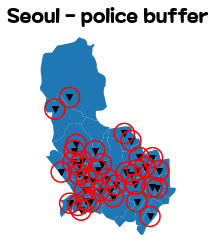

In [59]:
buf_poly = gpd.GeoDataFrame({'geometry': police.buffer(500)}) #500m
origin_ = gdf_exploded.groupby(['동']).apply(lambda x : x.area.sum())
ax = gdf_exploded['geometry'].plot()
police.plot(ax=ax, marker='v', color='black', label='police')
buf_poly.boundary.plot(ax=ax, color='red')
ax.set_title("Seoul - police buffer", fontsize=20)
ax.set_axis_off()
plt.show()
#print(origin_)

In [61]:
cctv=pd.read_csv('data/서울시CCTV좌표.csv')
cctv = cctv[['구명','법정동명','CCTV수량','lat','lng']]
cctv=cctv[cctv['구명'].isin(['종로구','중구'])]
cctv['geometry'] = cctv.apply(lambda row : Point([row['lng'], row['lat']]), axis=1)
cctv = gpd.GeoDataFrame(cctv, geometry='geometry')
cctv.crs = {'init':'epsg:4326'}
cctv = cctv.to_crs({'init':'epsg:5179'})
cctv

c:\Users\user\anaconda3\envs\pydatavenv\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
c:\Users\user\anaconda3\envs\pydatavenv\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
c:\Users\user\anaconda3\envs\pydatavenv\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/sta

,구명,법정동명,CCTV수량,lat,lng,geometry
0,종로구,충신동,1,37.575179,127.007360,POINT (956499.069 1952980.975)
1,종로구,부암동,1,37.596453,126.967939,POINT (953031.474 1955360.212)
2,종로구,익선동,1,37.573735,126.989771,POINT (954945.051 1952829.060)
3,종로구,창신동,1,37.573467,127.012433,POINT (956946.041 1952788.701)
4,종로구,팔판동,1,37.582970,126.980254,POINT (954110.330 1953858.246)
...,...,...,...,...,...,...
16495,종로구,숭인동,1,37.578247,127.019834,POINT (957602.290 1953315.634)
16496,종로구,숭인동,1,37.578859,127.021434,POINT (957743.879 1953382.871)
16497,종로구,숭인동,1,37.578859,127.021434,POINT (957743.879 1953382.871)
16498,종로구,숭인동,1,37.578859,127.021434,POINT (957743.879 1953382.871)


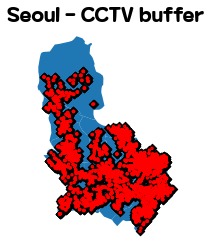

In [65]:
buf_poly2 = gpd.GeoDataFrame({'geometry': cctv.buffer(50)}) #50m
origin_ = gdf_exploded.groupby(['동']).apply(lambda x : x.area.sum())
ax = gdf_exploded['geometry'].plot()
cctv.plot(ax=ax, marker='D', color='black', label='CCTV')
buf_poly2.boundary.plot(ax=ax, color='red')
ax.set_title("Seoul - CCTV buffer", fontsize=20)
ax.set_axis_off()
plt.show()
# print(origin_)

In [66]:
buf_poly3=pd.concat([buf_poly,buf_poly2])

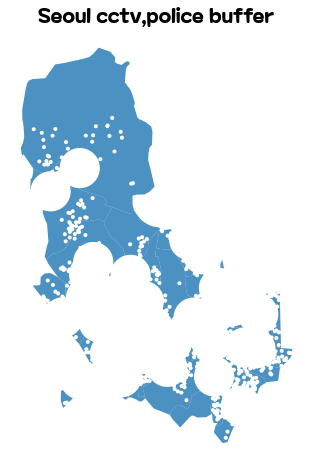

전체 대비 미커버지역 비율
동
평창동            90.0
무악동            69.0
삼청동            66.0
부암동            56.0
필동             51.0
장충동            48.0
동화동            46.0
가회동            44.0
청운효자동          39.0
종로1.2.3.4가동    34.0
약수동            31.0
청구동            29.0
신당5동           28.0
황학동            26.0
이화동            24.0
다산동            23.0
혜화동            15.0
교남동            14.0
숭인2동           13.0
중림동            12.0
dtype: float64


In [70]:
dif_area = gpd.overlay(gdf_exploded, buf_poly3, how='difference')
dif_area = dif_area.dissolve(by='동')
ax = dif_area.plot(figsize=(8,8), alpha=0.8)
ax.set_title("Seoul cctv,police buffer", fontsize=20)
ax.set_axis_off()
plt.show()
rate=round(dif_area.area / origin_ * 100)
rate=rate.sort_values(ascending=False)
print("전체 대비 미커버지역 비율")
print(rate.head(20))

In [81]:
rate_df = pd.DataFrame(rate)
rate_df.reset_index(drop=False, inplace=True)
rate_df.columns = ["동", "미커버지역_비율"]
rate_df.dropna(axis=0, inplace=True)
rate_df["미커버지역_비율"] = rate_df["미커버지역_비율"] / 100
rate_df

,동,미커버지역_비율
0,평창동,0.90
1,무악동,0.69
2,삼청동,0.66
3,부암동,0.56
4,필동,0.51
5,장충동,0.48
6,동화동,0.46
7,가회동,0.44
8,청운효자동,0.39
9,종로1.2.3.4가동,0.34


In [45]:
cover_area = {"미커버지역_비율": {"평창동": 90.0, "무악동": 69.0, "삼청동": 66.0, "부암동": 56.0, "필동": 51.0, "장충동": 48.0, "동화동": 46.0, "가회동": 44.0,\
                "청운효자동": 39.0, "종로1.2.3.4가동": 34.0, "약수동": 31.0, "청구동": 29.0, "신당5동": 28.0, "황학동": 26.0, "이화동": 24.0,\
                "다산동": 23.0, "혜화동": 15.0, "교남동": 14.0, "숭인2동": 13.0, "중림동": 12.0}}
df1 = pd.DataFrame(cover_area)
df1.reset_index(drop=False, inplace=True)
df1.rename(columns={"index": "동"}, inplace=True)
df1["미커버지역_비율"] = df1["미커버지역_비율"] / 100
df1

,동,미커버지역_비율
0,가회동,0.44
1,교남동,0.14
2,다산동,0.23
3,동화동,0.46
4,무악동,0.69
5,부암동,0.56
6,삼청동,0.66
7,숭인2동,0.13
8,신당5동,0.28
9,약수동,0.31


In [82]:
house_df5 = pd.merge(house_df2, rate_df, how = "left", on="동")
house_df5.dropna(inplace = True)
house_df5["취약지구선정"] = 1 -((house_df5["정규화_생활인구"] * 0.5) + (house_df5["1인가구_주택_비율"] * 0.3) + (house_df5["미커버지역_비율"] * 0.2))
house_df5

,구,동,coordinates,총생활인구수,정규화_생활인구,합계,1인가구_주택_비율,미커버지역_비율,취약지구선정
0,종로구,종로1.2.3.4가동,"[[126.99649978451932, 37.581022567729896], [12...",4.849834e+07,0.573110,395,0.239104,0.34,0.573714
1,중구,명동,"[[126.9770344988775, 37.569194530054546], [126...",2.447642e+07,0.289240,119,0.217550,0.05,0.780115
2,종로구,혜화동,"[[127.00419481761703, 37.58795048303252], [127...",2.210701e+07,0.261241,3092,0.610464,0.15,0.656240
3,중구,소공동,"[[126.98108737734889, 37.56180104199569], [126...",2.077476e+07,0.245497,12,0.017518,0.08,0.855996
4,중구,회현동,"[[126.98536412773345, 37.5542383883403], [126....",1.981352e+07,0.234139,230,0.131881,0.06,0.831367
5,종로구,사직동,"[[126.97688884274817, 37.575650779448786], [12...",1.948225e+07,0.230224,956,0.344132,0.01,0.779648
6,중구,신당동,"[[127.0180743572028, 37.56556664980869], [127....",1.799491e+07,0.212648,902,0.357086,0.02,0.782550
7,종로구,이화동,"[[127.00733253963132, 37.583203339216226], [12...",1.774538e+07,0.209699,1951,0.743521,0.24,0.624094
8,중구,광희동,"[[127.00956791097168, 37.563025744036686], [12...",1.704162e+07,0.201383,344,0.188184,0.06,0.830854


In [83]:
min_index = house_df5["취약지구선정"].idxmin()
final_select_dong = pd.DataFrame(house_df5.iloc[int(min_index)]).T
final_select_dong

,구,동,coordinates,총생활인구수,정규화_생활인구,합계,1인가구_주택_비율,미커버지역_비율,취약지구선정
0,종로구,종로1.2.3.4가동,"[[126.99649978451932, 37.581022567729896], [12...",48498339.0793,0.57311,395,0.239104,0.34,0.573714


In [90]:
# Make layer
layer = pdk.Layer(
    'PolygonLayer', # 사용할 Layer 타입
    final_select_dong, # 시각화에 쓰일 데이터프레임
    get_polygon='coordinates', # geometry 정보를 담고있는 컬럼 이름
    get_fill_color='[255, 0, 0]', # 각 데이터 별 rgb 또는 rgba 값 (0~255)
    pickable=True, # 지도와 interactive 한 동작 on
    auto_highlight=True # 마우스 오버(hover) 시 박스 출력
)

# Set the viewport location
center = [126.986, 37.565]
view_state = pdk.ViewState(
    longitude=center[0],
    latitude=center[1],
    zoom=10)

# Render
r = pdk.Deck(layers=[layer], mapbox_key = MAPBOX_API_KEY, initial_view_state=view_state)
# r.show()
r.to_html("output/final_select_dong.html")